Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data,index=labels)
data

{'animal': ['cat',
  'cat',
  'snake',
  'dog',
  'dog',
  'cat',
  'snake',
  'cat',
  'dog',
  'dog'],
 'age': [2.5, 3, 0.5, nan, 5, 2, 4.5, nan, 7, 3],
 'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
 'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [3]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**3.** Return the first 3 rows of the DataFrame `df`.

In [4]:
df.head(3)


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [5]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [6]:
df.loc[['d','e','i'],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [7]:
filtered_df = df[df['visits'] > 3]
print(filtered_df)

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [8]:
missing_age_rows = df[df['age'].isnull()]
print(missing_age_rows)

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [9]:
animal_cat = df[df['animal'] == 'cat']
age_less_than_3 = animal_cat[animal_cat['age'] < 3]
print(age_less_than_3)

  animal  age  visits priority
a    cat  2.5       1      yes
f    cat  2.0       3       no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [10]:
age_between_2_and_4 = df[(df['age'] >= 2) & (df['age'] <= 4)]
print(age_between_2_and_4)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


**10.** Change the age in row 'f' to 1.5.

In [11]:
df.loc['f', 'age'] = 1.5
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [12]:
total_visits = df['visits'].sum()
print(total_visits)

19


**12.** Calculate the mean age for each different animal in `df`.

In [13]:
mean_age = df.groupby('animal')['age'].mean()
print(mean_age)

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [18]:
df1 = pd.concat([df, pd.DataFrame({'animal':['snake'],'age':[2],'visits':[2],'priority':['yes']}, index=['k'])])

df = df1.drop('k', errors='ignore')


print(df)


  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**14.** Count the number of each type of animal in `df`.

In [19]:
type_count = df['animal'].value_counts()
print(type_count)

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [20]:
sort_age = df.sort_values(by='age',ascending=True)
sort_visits = sort_age.sort_values(by='visits',ascending=True)
print(sort_visits)

  animal  age  visits priority
a    cat  2.5       1      yes
j    dog  3.0       1       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
e    dog  5.0       2       no
i    dog  7.0       2       no
c  snake  0.5       2       no
b    cat  3.0       3      yes
f    cat  1.5       3       no
d    dog  NaN       3      yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [21]:
df.loc[df['priority']=='yes', 'priority'] = True
df.loc[df['priority']== 'no', 'priority'] = False
print(df)

  animal  age  visits priority
a    cat  2.5       1     True
b    cat  3.0       3     True
c  snake  0.5       2    False
d    dog  NaN       3     True
e    dog  5.0       2    False
f    cat  1.5       3    False
g  snake  4.5       1    False
h    cat  NaN       1     True
i    dog  7.0       2    False
j    dog  3.0       1    False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [22]:
df.loc[df['animal'] == 'snake', 'animal'] = 'python'
print(df)

   animal  age  visits priority
a     cat  2.5       1     True
b     cat  3.0       3     True
c  python  0.5       2    False
d     dog  NaN       3     True
e     dog  5.0       2    False
f     cat  1.5       3    False
g  python  4.5       1    False
h     cat  NaN       1     True
i     dog  7.0       2    False
j     dog  3.0       1    False


**18.** Load the ny-flights dataset to Python

In [ ]:
data = pd.read_csv('/content/ny-flights.csv')

**19.** Which airline ID is present maximum times in the dataset

In [ ]:
max_ID = data['airline_id'].idxmax()
print(max_ID)

546


**20.** Draw a plot between dep_delay and arr_delay

<Axes: xlabel='dep_delay', ylabel='arr_delay'>

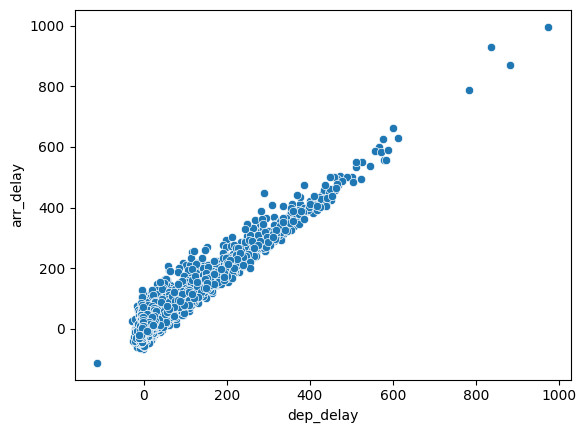

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='dep_delay', y='arr_delay')